In [1]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)


In [2]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
image_file=get_pkg_data_filename(r"/home/ambica/Desktop/Colour Composite Images Project/F125W.fits")
fits.info(image_file)
print(repr(fits.getheader(image_file, 0)))

Filename: /home/ambica/Desktop/Colour Composite Images Project/F125W.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    4325   (30720, 12800)   float32   
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                30720                                                  
NAXIS2  =                12800                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
NEXTEND =                    1 / Number of standard extensions                  
FILENAME= 'uds-f125w-astrodrizzle-v4.0_drz_sci.fits' / name of file             
FILETYPE= 'SCI      '          / type of data found in data file 

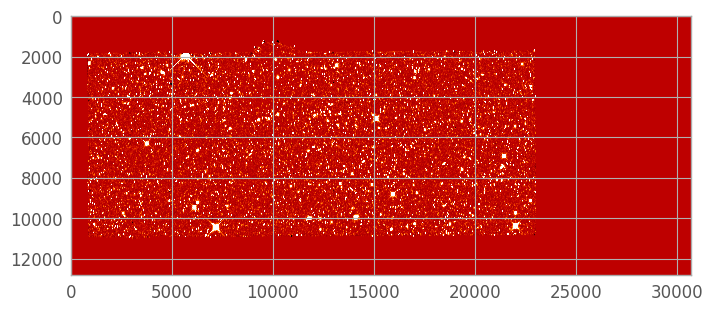

In [3]:
image_data=fits.getdata(image_file,ext=0)
from astropy.visualization import ZScaleInterval
#Image normalisation
z=ZScaleInterval()
z1,z2=z.get_limits(image_data)
plt.figure()
plt.imshow(image_data,vmin=z1,vmax=z2)

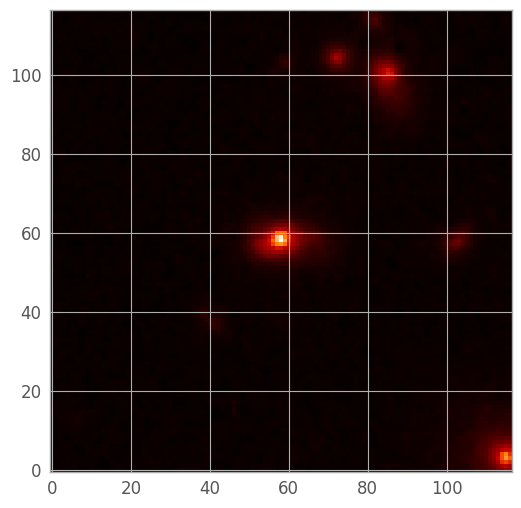

In [22]:
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
#f=fits.open(r"/home/ambica/Desktop/Colour Composite Images Project/Data.fits")
f=fits.open(image_file)
w= WCS(f[0].header)
sky=SkyCoord(34.37084961, -5.214492798, unit="deg")
position=w.world_to_pixel(sky)
size=u.Quantity((7,7),u.arcsec)
cutout=Cutout2D(image_data,position,size,wcs=w)
plt.imshow(cutout.data,origin='lower')
hdu=fits.PrimaryHDU()
hdu.data=cutout.data
hdu.header=f[0].header
hdu.header.update(cutout.wcs.to_header())
hdu.writeto('testcutout1.fits',overwrite=True)


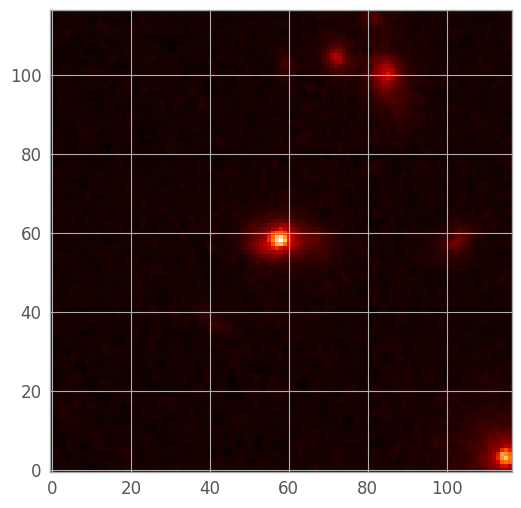

In [23]:
#F140W
image_file2=get_pkg_data_filename(r"/home/ambica/Desktop/Colour Composite Images Project/F140W.fits")
image_data2=fits.getdata(image_file2,ext=0)
f2=fits.open(image_file2)
w= WCS(f2[0].header)
cutout2=Cutout2D(image_data2,position,size,wcs=w)
plt.imshow(cutout2.data,origin='lower')
hdu2=fits.PrimaryHDU()
hdu2.data=cutout2.data
hdu2.header=f2[0].header
hdu2.header.update(cutout2.wcs.to_header())
hdu2.writeto('testcutout2.fits',overwrite=True)

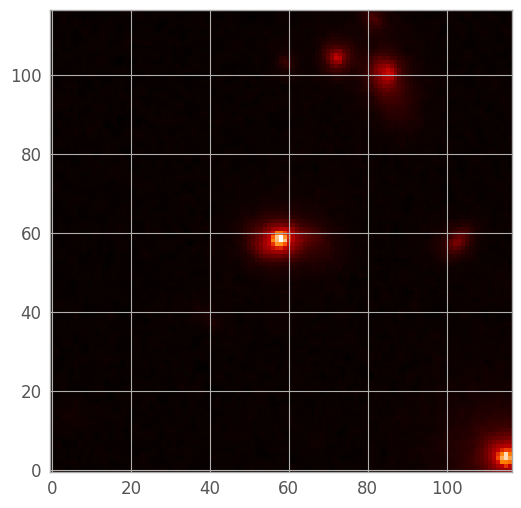

In [24]:
#F160W
image_file3=get_pkg_data_filename(r"/home/ambica/Desktop/Colour Composite Images Project/F160W.fits")
image_data3=fits.getdata(image_file3,ext=0)
f3=fits.open(image_file3)
w= WCS(f3[0].header)
cutout3=Cutout2D(image_data3,position,size,wcs=w)
plt.imshow(cutout3.data,origin='lower')
hdu3=fits.PrimaryHDU()
hdu3.data=cutout3.data
hdu3.header=f3[0].header
hdu3.header.update(cutout3.wcs.to_header())
hdu3.writeto('testcutout3.fits',overwrite=True)

In [25]:
#F606W
#Fixing inconsistent SIP Distortion
image_file4=get_pkg_data_filename(r"/home/ambica/Desktop/Colour Composite Images Project/F606W.fits")
print(repr(fits.getheader(image_file4,0)))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                30720                                                  
NAXIS2  =                12800                                                  
ORIGIN  = 'SExtractor'         / FITS file originator                           
IRAF-TLM= '2013-04-11T23:32:14' / Time of last modification                     
OBJECT  = 'CANDELS_UDS_TOT_ACS_F606W_030MAS_V1.0_SECT12_DRZ[1/1]'               
DATE    = '2013-04-11T23:34:49'                                                 
IRAF-MAX=           0.000000E0  /  DATA MAX                                     
IRAF-MIN=           0.000000E0  /  DATA MIN                                     
CRPIX1  =              12000.5                                                  
CRVAL1  =             34.406

In [26]:
"""
with fits.open(image_file4, 'update') as f4:
    for hdu in f4:
        i=2
        while i<=4:
            j=0
            while(j<=i):
                strng='A_'+str(j)+'_'+str(i-j)
                strngb='B_'+str(j)+'_'+str(i-j)
                j+=1
                del hdu.header[strng]
                del hdu.header[strngb]
            i+=1
print(repr(fits.getheader(image_file4,0)))
"""

"\nwith fits.open(image_file4, 'update') as f4:\n    for hdu in f4:\n        i=2\n        while i<=4:\n            j=0\n            while(j<=i):\n                strng='A_'+str(j)+'_'+str(i-j)\n                strngb='B_'+str(j)+'_'+str(i-j)\n                j+=1\n                del hdu.header[strng]\n                del hdu.header[strngb]\n            i+=1\nprint(repr(fits.getheader(image_file4,0)))\n"

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


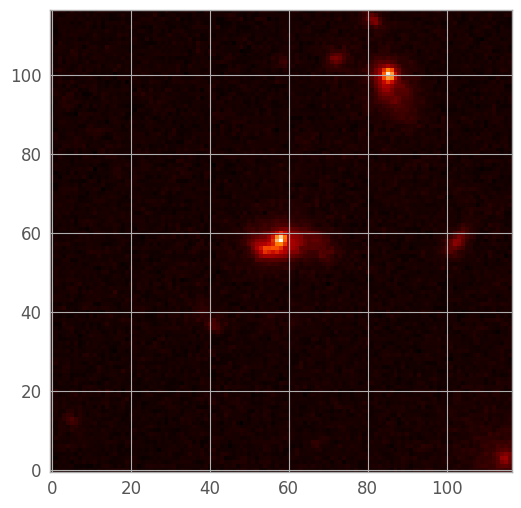

In [27]:
image_data4=fits.getdata(image_file4,ext=0)
f4=fits.open(image_file4)
w= WCS(f4[0].header)
w.sip=None
cutout4=Cutout2D(image_data4,position,size,wcs=w)
plt.imshow(cutout4.data,origin='lower')
hdu4=fits.PrimaryHDU()
hdu4.data=cutout4.data
hdu4.header=f4[0].header
hdu4.header.update(cutout4.wcs.to_header())
hdu4.writeto('testcutout4.fits', overwrite=True)

In [28]:
#F814W
image_file5=get_pkg_data_filename(r"/home/ambica/Desktop/Colour Composite Images Project/F814W.fits")
image_data5=fits.getdata(image_file5,ext=0)
print(repr(fits.getheader(image_file5,0)))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                30720                                                  
NAXIS2  =                12800                                                  
ORIGIN  = 'SExtractor'         / FITS file originator                           
IRAF-TLM= '2013-04-10T20:27:00' / Time of last modification                     
OBJECT  = 'CANDELS_UDS_TOT_ACS_F814W_030MAS_V1.0_SECT12_DRZ[1/1]'               
DATE    = '2013-04-10T20:39:45'                                                 
IRAF-MAX=           0.000000E0  /  DATA MAX                                     
IRAF-MIN=           0.000000E0  /  DATA MIN                                     
CRPIX1  =              12000.5                                                  
CRVAL1  =             34.406

In [29]:
"""
with fits.open(image_file5, 'update') as f5:
    for hdu in f5:
        i=2
        while i<=4:
            j=0
            while(j<=i):
                strng='A_'+str(j)+'_'+str(i-j)
                strngb='B_'+str(j)+'_'+str(i-j)
                j+=1
                del hdu.header[strng]
                del hdu.header[strngb]
            i+=1
print(repr(fits.getheader(image_file5,0)))
"""


"\nwith fits.open(image_file5, 'update') as f5:\n    for hdu in f5:\n        i=2\n        while i<=4:\n            j=0\n            while(j<=i):\n                strng='A_'+str(j)+'_'+str(i-j)\n                strngb='B_'+str(j)+'_'+str(i-j)\n                j+=1\n                del hdu.header[strng]\n                del hdu.header[strngb]\n            i+=1\nprint(repr(fits.getheader(image_file5,0)))\n"

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
        Incon

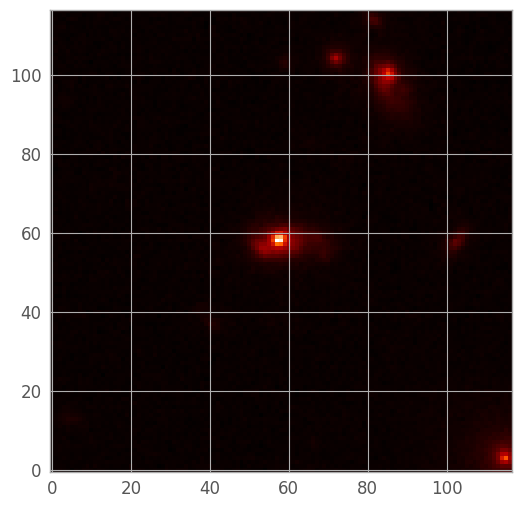

In [30]:

f5=fits.open(image_file5)
f5=fits.open(image_file5)
w= WCS(f5[0].header)
cutout5=Cutout2D(image_data5,position,size,wcs=w)
plt.imshow(cutout5.data,origin='lower')
hdu5=fits.PrimaryHDU()
hdu5.data=cutout5.data
hdu5.header=f5[0].header
hdu5.header.update(cutout5.wcs.to_header())
hdu5.writeto('testcutout5.fits',overwrite=True)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
             

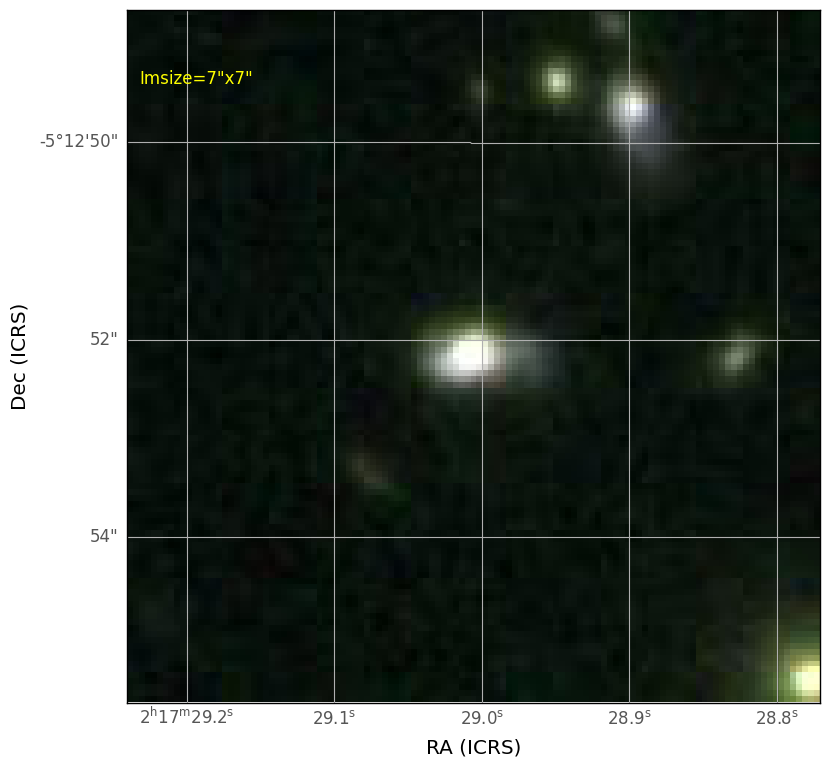

In [31]:
import aplpy 
aplpy.make_rgb_cube(['testcutout1.fits','testcutout2.fits','testcutout5.fits'],'cube.fits')
aplpy.make_rgb_image('cube.fits','finalimg.jpeg')
img=aplpy.FITSFigure('cube_2d.fits')
img.add_label(0.1, 0.9, 'Imsize=7"x7"',color='yellow', relative=True)
img.show_rgb('finalimg.jpeg')


Text(10, 110, 'Imsize=7"x7"')

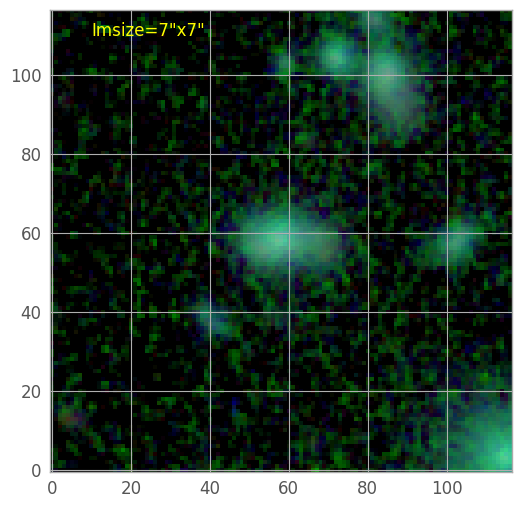

In [32]:
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
g_name=get_pkg_data_filename('testcutout1.fits')
r_name=get_pkg_data_filename('testcutout2.fits')
i_name=get_pkg_data_filename('testcutout5.fits')
g = fits.open(g_name)[0].data
r = fits.open(r_name)[0].data
i = fits.open(i_name)[0].data

rgb_default = make_lupton_rgb(1e+3*i, 1e+3*r, 1e+3*g, Q=10, stretch=100,filename="output.jpeg")
plt.imshow(rgb_default, origin='lower')
plt.annotate('Imsize=7"x7"',(10,110),color='yellow')